In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuscitk.neuscitk as ntk

In [2]:
dataset = ntk.LabChartDataset('assets/datasets/ntk_tut_data.mat')

In [3]:
block = dataset.get_block(1)[0]
dataset.fs

20000.0

In [4]:
sorted_spikes = ntk.sort_spikes(
    arr = block,
    fs = 20000
)

c:\Users\jerem\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jerem\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jerem\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jerem\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

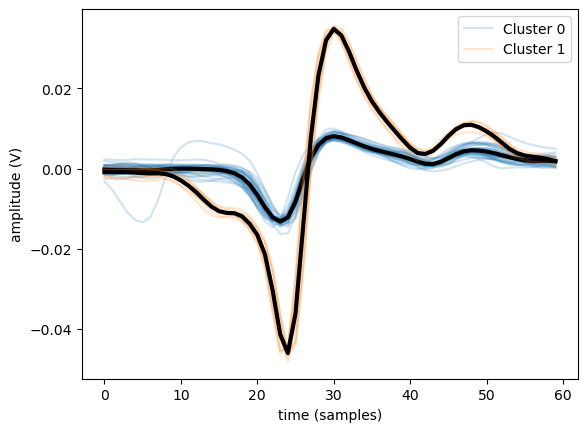

In [5]:
sorted_spikes.plot_clusters()

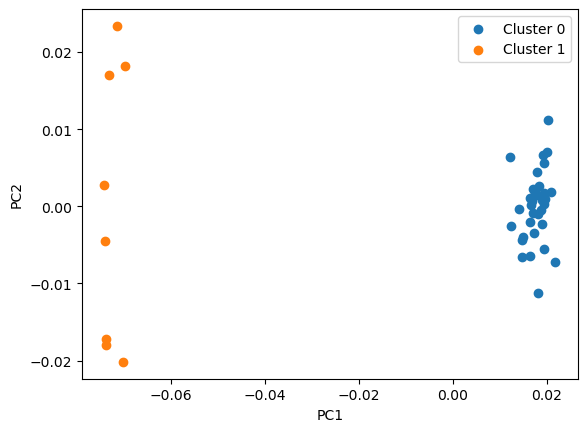

In [6]:
sorted_spikes.plot_pca()

In [7]:
cluster_1 = sorted_spikes.get_cluster_waveforms(0)

In [8]:
ntk.area_under_curve(cluster_1.mean(0), 20000, True)

6.13428e-06

In [9]:
waveform = cluster_1.mean(0)

In [13]:
import numpy as np
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

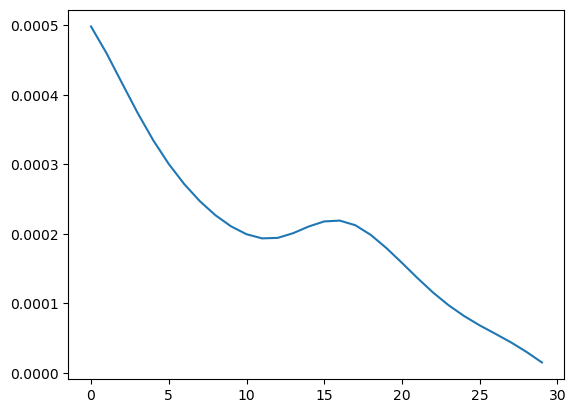

In [15]:
plt.plot(autocorr(waveform[30:]))

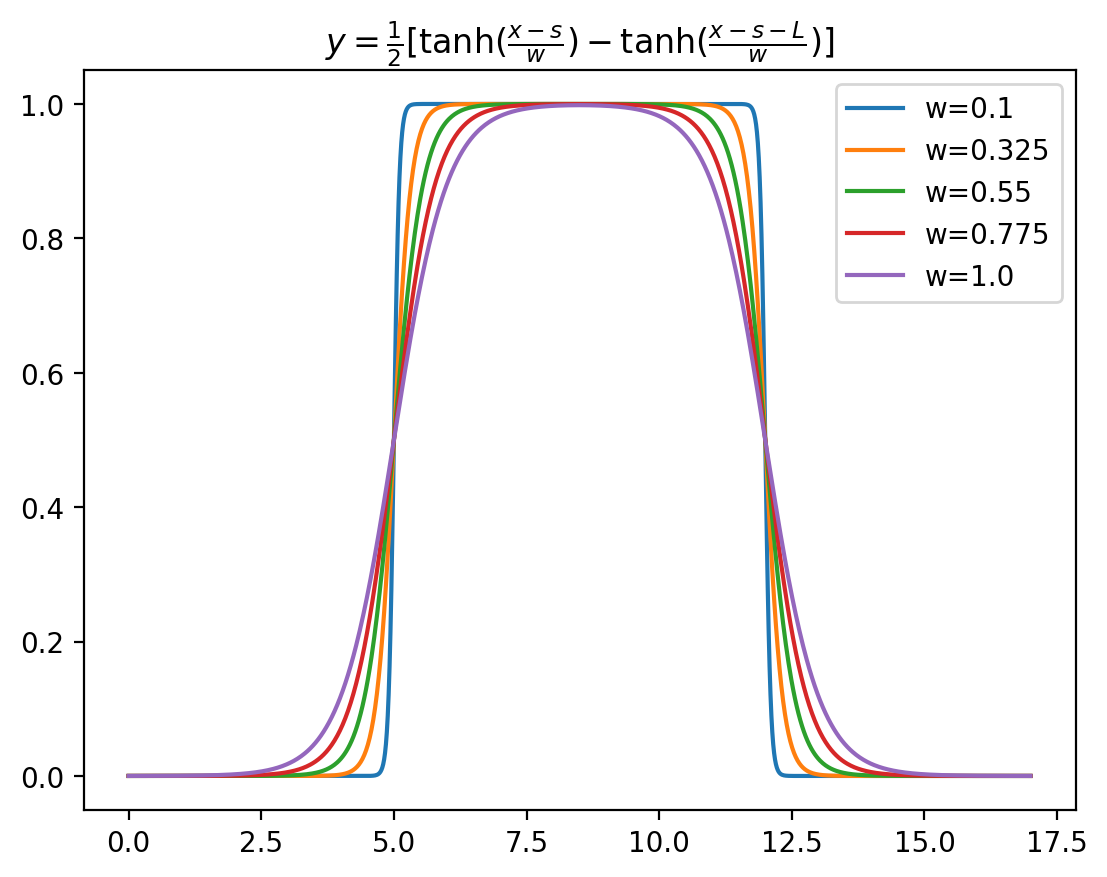

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
def double_sigmoid(x, c, w, L) -> np.ndarray:
    upramp = np.tanh((x - c) / w)
    downramp = np.tanh((x - c - L) / w)
    return (upramp - downramp) / 2

x = np.linspace(0, 17, 1000)
w = np.linspace(0.1, 1, 5)
for w_val in w:
    y = double_sigmoid(x, 5, w_val, 7)
    plt.plot(x, y, label=f'w={w_val}')

plt.title(r'$y = \frac{1}{2}[\tanh(\frac{x - s}{w}) - \tanh(\frac{x - s - L}{w})]$')
plt.legend()

In [8]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])